In [4]:
#install.packages("corrplot")
library(corrplot)

In [5]:
CoRSIV <- read.csv("../files/CoRSIV_9926_gencode28.csv")

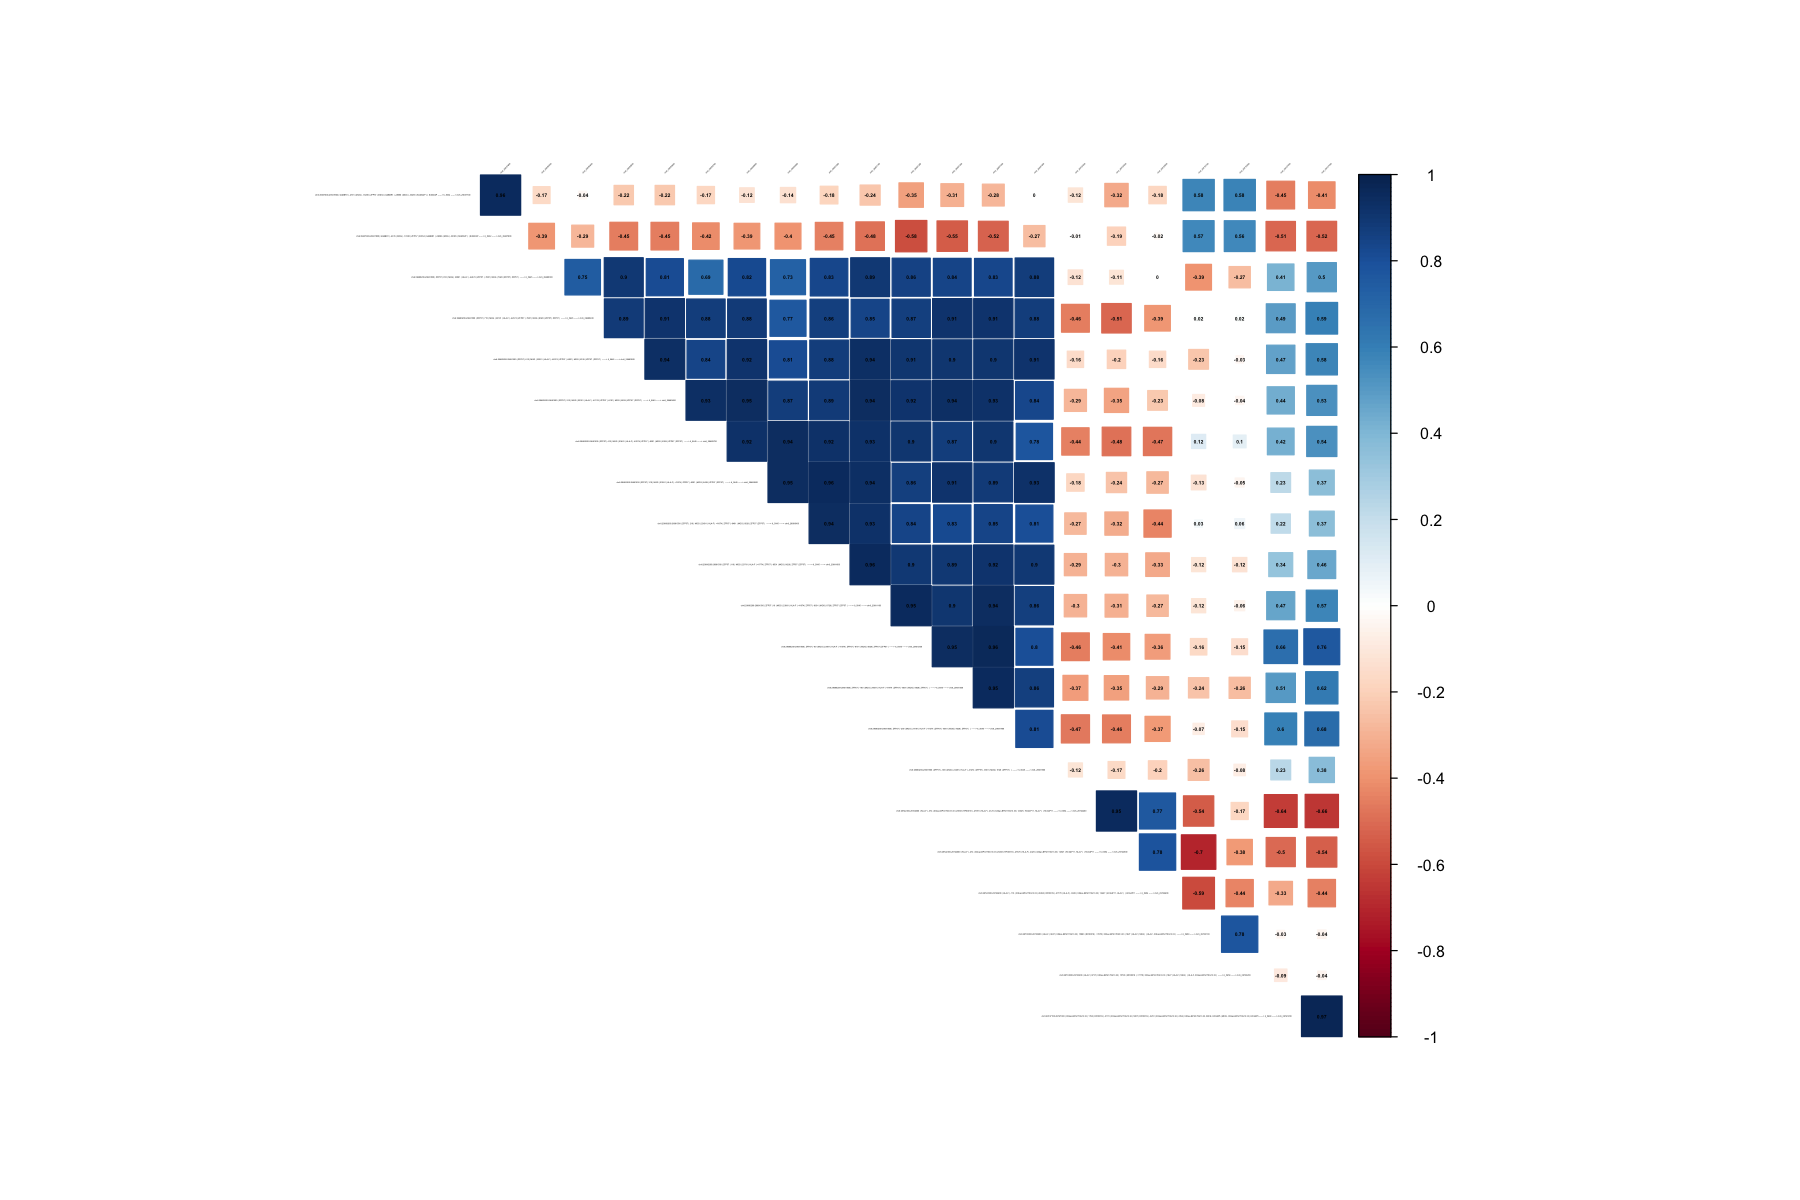

In [28]:
#CoRSIV <- read.csv("./CoRSIV_9926_gencode28.csv")
x = toupper("zfp57")

CoRSIV_gene <- CoRSIV[(CoRSIV$promoter....3kb.TSS..overlapping.genes==x)|(CoRSIV$gene.body.overlapping.genes==x)|(CoRSIV$three.prime.region.....3kb.TES..overlapping.genes==x),]



chr_num <- CoRSIV_gene$Chromosome[1]
mid <- CoRSIV_gene$BP[1]

start <- mid-100000
end <- mid + 100000

CoRSIV_chr <- CoRSIV[CoRSIV$Chromosome==chr_num & (start < CoRSIV$BP) & (CoRSIV$BP < end),]



annotated_blocks <- CoRSIV_chr[order(CoRSIV_chr$BP),]
candidate_blocks <-annotated_blocks




min_corr = 0
library(corrplot)
bin_num = 1
pos<-c()
cor_val <-c()
start=bin_num
end = dim(candidate_blocks)[1]

#start = 1
#end = 207
num_of_bins = dim(candidate_blocks)[1]
test <- t(candidate_blocks[start:end,5:14])
colnames(test) <-candidate_blocks$Bin.Name[start:end]
col_names<-as.character(candidate_blocks$Bin.Name[start:end])
M <-matrix(0,dim(test)[2],dim(test)[2])
for(k in 1:(dim(test)[2]-1)){
  if(k>40){# increase this to plot columns in figure
    #M[i1,i2] <-0
    break
  }
  for(i in 1:(dim(test)[2]-k)){
    i1 <-i
    i2 <-i+k
    M[i1,i2] <- cor(test[,i1],test[,i2],use="pairwise.complete.obs")
    if(k==1){
      if(M[i1,i2] >= min_corr){
        #cor_pair_df<-rbind(cor_pair_df,c(as.character(col_names[i1]),as.character(col_names[i2]),as.numeric(M[i1,i2])))
        pos <- c(pos,as.character(col_names[i1]))
        cor_val <-c(cor_val,as.numeric(M[i1,i2]))
        pos <- c(pos,as.character(col_names[i2]))
        cor_val <-c(cor_val,as.numeric(M[i1,i2]))
        
      }
    }
    
  }
}
m <- M

#paste(candidate_blocks$EMBL_ID,candidate_blocks$Bin.Name,sep = "__")

colnames(m)<-as.character(candidate_blocks$Bin.Name)[start:end]
rownames(m)<-as.character(paste(paste(annotated_blocks$USCS_Coordinates_CoRSIV,annotated_blocks$GS1.Name,annotated_blocks$GS1.Distance,
                                      annotated_blocks$GS2.Name,annotated_blocks$GS2.Distance,
                                      annotated_blocks$GS3.Name,annotated_blocks$GS3.Distance,
                                      annotated_blocks$GE1.Name,annotated_blocks$GE1.Distance,
                                      annotated_blocks$GE2.Name,annotated_blocks$GE2.Distance,
                                      annotated_blocks$promoter....3kb.TSS..overlapping.genes,
                                      annotated_blocks$gene.body.overlapping.genes,
                                      annotated_blocks$three.prime.region.....3kb.TES..overlapping.genes,sep = " | "),candidate_blocks$Uniq_ID,candidate_blocks$Bin.Name,sep = " ------> "))[start:end]

#colnames(m)<-as.character(candidate_blocks$Bin.Name)[start:end]
#rownames(m)<-as.character(candidate_blocks$Bin.Name)[start:end]

#install.packages("extrafont")
#library("extrafont")
#font_import()
#library(extrafont)
#loadfonts()



if(num_of_bins<50){
  size = 50
}else if(50 < num_of_bins & num_of_bins < 75){
  size = num_of_bins
}else if(num_of_bins > 75){
  size = 100
}


#pdf(file=paste("CoRSIVs_Overlapping_",x,"_and_CoRSIVs_in_1Mb_region.pdf",sep = ""),family = "Courier",width = size,height = size)
options(repr.plot.width=15, repr.plot.height=10)
    
    corrplot(m, type = "upper", tl.pos = "td",
         method = "square", tl.cex = 0.1, tl.col = 'black',
         diag = FALSE,tl.srt=45,addgrid.col = NA,is.corr = FALSE,addCoef.col = "black",number.cex = .25,cl.lim = c(-1, 1))
#dev.off()



In [ ]:
#chr6:28,510,120-33,480,577
region <- "1:4008300"
chr_num <- 6
CoRSIV_chr <- CoRSIV[CoRSIV$Chromosome==chr_num & ((28510120) <= CoRSIV$BP) & (CoRSIV$BP <= (33480577)),]
uniq_corsiv<- CoRSIV_chr[!(duplicated(CoRSIV_chr$Uniq_ID)),]
  annotated_blocks <- CoRSIV_chr[order(CoRSIV_chr$BP),]
  candidate_blocks <-annotated_blocks
  
  
  
  min_corr = 0
  library(corrplot)
    bin_num = 1
    pos<-c()
    cor_val <-c()
    start=bin_num
    end = dim(candidate_blocks)[1]
  
    #start = 1
    #end = 207
    num_of_bins = dim(candidate_blocks)[1]
    test <- t(candidate_blocks[start:end,5:14])
    colnames(test) <-candidate_blocks$Bin.Name[start:end]
    col_names<-as.character(candidate_blocks$Bin.Name[start:end])
    M <-matrix(0,dim(test)[2],dim(test)[2])
    for(k in 1:(dim(test)[2]-1)){
      if(k>40){# increase this to plot columns in figure
        #M[i1,i2] <-0
        break
      }
      for(i in 1:(dim(test)[2]-k)){
        i1 <-i
        i2 <-i+k
        M[i1,i2] <- cor(test[,i1],test[,i2],use="pairwise.complete.obs")
        if(k==1){
          if(M[i1,i2] >= min_corr){
            #cor_pair_df<-rbind(cor_pair_df,c(as.character(col_names[i1]),as.character(col_names[i2]),as.numeric(M[i1,i2])))
            pos <- c(pos,as.character(col_names[i1]))
            cor_val <-c(cor_val,as.numeric(M[i1,i2]))
            pos <- c(pos,as.character(col_names[i2]))
            cor_val <-c(cor_val,as.numeric(M[i1,i2]))
  
          }
        }
  
      }
    }
    m <- M
  
    #paste(candidate_blocks$EMBL_ID,candidate_blocks$Bin.Name,sep = "__")
  
    colnames(m)<-as.character(candidate_blocks$Bin.Name)[start:end]
    rownames(m)<-as.character(paste(paste(annotated_blocks$USCS_Coordinates_CoRSIV,annotated_blocks$GS1.Name,annotated_blocks$GS1.Distance,
                                        annotated_blocks$GS2.Name,annotated_blocks$GS2.Distance,
                                        annotated_blocks$GS3.Name,annotated_blocks$GS3.Distance,
                                        annotated_blocks$GE1.Name,annotated_blocks$GE1.Distance,
                                        annotated_blocks$GE2.Name,annotated_blocks$GE2.Distance,
                                        annotated_blocks$promoter....3kb.TSS..overlapping.genes,
                                        annotated_blocks$gene.body.overlapping.genes,
                                        annotated_blocks$three.prime.region.....3kb.TES..overlapping.genes,sep = " | "),candidate_blocks$Uniq_ID,candidate_blocks$Bin.Name,sep = " ------> "))[start:end]
  
    colnames(m)<-as.character(candidate_blocks$Bin.Name)[start:end]
    rownames(m)<-as.character(candidate_blocks$Bin.Name)[start:end]
  
    #install.packages("extrafont")
    #library("extrafont")
    #font_import()
    #library(extrafont)
    #loadfonts()
  
    pdf(file=paste("./chr",chr_num,"_",end,"_CorRSIV_plot_sub_telomere.pdf",sep = ""),family = "Courier",width = 50,height = 50)
    corrplot(m, type = "upper", tl.pos = "td",
             method = "square", tl.cex = 1, tl.col = 'black',
             diag = FALSE,tl.srt=45,addgrid.col = NA,is.corr = FALSE,addCoef.col = "black",number.cex = .05)
    
   
    dev.off()


In [ ]:

chr_num = 22
CoRSIV_chr <- CoRSIV[CoRSIV$Chromosome==chr_num,]
annotated_blocks <- CoRSIV_chr[order(CoRSIV_chr$BP),]
candidate_blocks <-annotated_blocks



min_corr = 0

num_of_bins = dim(candidate_blocks)[1]
remainder <- num_of_bins%%500
end_of_bin <- num_of_bins - remainder
section = 0
for(bin_num in seq(1,end_of_bin,500)){
#bin_num = 1
section = section + 1
pos<-c()
cor_val <-c()
start=bin_num
if(section < floor(num_of_bins/500)){
  end = bin_num + 499
}else{
  end = bin_num + 499 + remainder
}

#start = 1
#end = 207
num_of_bins = dim(candidate_blocks)[1]
test <- t(candidate_blocks[start:end,5:14])
colnames(test) <-candidate_blocks$Bin.Name[start:end]
col_names<-as.character(candidate_blocks$Bin.Name[start:end])
M <-matrix(0,dim(test)[2],dim(test)[2])
for(k in 1:(dim(test)[2]-1)){
  if(k>1000){# increase this to plot columns in figure
    #M[i1,i2] <-0
    break
  }
  for(i in 1:(dim(test)[2]-k)){
    i1 <-i
    i2 <-i+k
    M[i1,i2] <- cor(test[,i1],test[,i2],use="pairwise.complete.obs")
    if(k==1){
      if(M[i1,i2] >= min_corr){
        #cor_pair_df<-rbind(cor_pair_df,c(as.character(col_names[i1]),as.character(col_names[i2]),as.numeric(M[i1,i2])))
        pos <- c(pos,as.character(col_names[i1]))
        cor_val <-c(cor_val,as.numeric(M[i1,i2]))
        pos <- c(pos,as.character(col_names[i2]))
        cor_val <-c(cor_val,as.numeric(M[i1,i2]))

      }
    }

  }
}
m <- M

#paste(candidate_blocks$EMBL_ID,candidate_blocks$Bin.Name,sep = "__")

colnames(m)<-as.character(candidate_blocks$Bin.Name)[start:end]
rownames(m)<-as.character(paste(paste(annotated_blocks$USCS_Coordinates_CoRSIV,annotated_blocks$GS1.Name,annotated_blocks$GS1.Distance,
                                    annotated_blocks$GS2.Name,annotated_blocks$GS2.Distance,
                                    annotated_blocks$GS3.Name,annotated_blocks$GS3.Distance,
                                    annotated_blocks$GE1.Name,annotated_blocks$GE1.Distance,
                                    annotated_blocks$GE2.Name,annotated_blocks$GE2.Distance,
                                    annotated_blocks$promoter....3kb.TSS..overlapping.genes,
                                    annotated_blocks$gene.body.overlapping.genes,
                                    annotated_blocks$three.prime.region.....3kb.TES..overlapping.genes,sep = " | "),candidate_blocks$Uniq_ID,candidate_blocks$Bin.Name,sep = " ------> "))[start:end]

#colnames(m)<-as.character(candidate_blocks$Bin.Name)[start:end]
#rownames(m)<-as.character(candidate_blocks$Bin.Name)[start:end]

#install.packages("extrafont")
#library("extrafont")
#font_import()
#library(extrafont)
#loadfonts()

pdf(file=paste("./chr",chr_num,"_",end,"_CorRSIV_plot_0.71_ITC_fill_all.pdf",sep = ""),family = "Courier",width = 200,height = 200)
corrplot(m, type = "upper", tl.pos = "td",
         method = "square", tl.cex = 1, tl.col = 'black',
         diag = FALSE,tl.srt=45,addgrid.col = NA,is.corr = FALSE,addCoef.col = "black",number.cex = .35)
dev.off()
}

